# 0. Read XML and get measures to invert chords

### A. Parse tree

In [1]:
import xml.etree.cElementTree as ET

filename = "../../XMLs/至少還有你_主旋律.musicxml"
tree = ET.parse(filename)


In [2]:
root = tree.getroot()
root.tag, root.attrib

('score-partwise', {'version': '3.1'})

In [3]:
all_notes = root.findall('.//note')

### B. Read measures

In [4]:
from mxlParsing import *

xml_measures = root.findall('.//measure')
measures = []

for xml_measure in xml_measures:
    measure = Measure(get_meas_notes_xml(xml_measure))
    if not measure.get_sos()==['0']:
        measures.append(measure)

In [5]:
for measure in measures:
    measure.printMeasure()

Note: rest / half
Note: rest / quarter
Note: rest / eighth
Note: G4 / 16th / None
Note: G4 / 16th / None
Note: F4 / eighth / None
Note: A4 / 16th / None
Note: D5 / 16th / start
Note: D5 / half / stop
Note: D5 / eighth / stop
Note: A4 / 16th / None
Note: A4 / 16th / None
Note: D5 / eighth / None
Note: A4 / 16th / None
Note: B4 / 16th / start
Note: B4 / half / stop
Note: B4 / eighth / stop
Note: G4 / 16th / None
Note: G4 / 16th / None
Note: F4 / eighth / None
Note: A4 / eighth / None
Note: D5 / eighth / None
Note: E5 / 16th / None
Note: E5 / 16th / start
Note: E5 / 16th / stop
Note: D5 / eighth / None
Note: rest / eighth
Note: D5 / 16th / None
Note: E5 / 16th / None
Note: F5 / eighth / None
Note: C5 / 16th / None
Note: C5 / 16th / start
Note: C5 / eighth / stop
Note: B4 / eighth / None
Note: C5 / quarter / None
Note: A4 / 16th / None
Note: A4 / 16th / None
Note: B4 / eighth / None
Note: D5 / eighth / None
Note: D5 / eighth / None
Note: B4 / 16th / None
Note: E5 / 16th / start
Note: E5 / 

# 1. Explore Music21

In [6]:
from music21 import *
import copy


music21: Certain music21 functions might need the optional package scipy;
                  if you run into errors, install it by following the instructions at
                  http://mit.edu/music21/doc/installing/installAdditional.html


In [7]:
import copy

it = ['M-3','P1','A4']
it

['M-3', 'P1', 'A4']

In [8]:
p = pitch.Pitch('F4')
cList = []

for i in it:
    print(i)
    pNew = p.transpose(i, inPlace=False)
    cList.append(pNew)

cList

M-3
P1
A4


[<music21.pitch.Pitch D-4>, <music21.pitch.Pitch F4>, <music21.pitch.Pitch B4>]

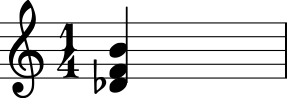

In [10]:
%matplotlib inline
import os

#Ubuntu
environment.set("musicxmlPath", "/usr/bin/musescore")
environment.set("musescoreDirectPNGPath", "/usr/bin/musescore")

#Windows
#environment.set("musicxmlPath", "C:/Program Files/MuseScore 3/bin/MuseScore3.exe")
#environment.set("musescoreDirectPNGPath", "C:/Program Files/MuseScore 3/bin/MuseScore3.exe")
#environment.set("lilypondPath", "C:/Program Files (x86)/LilyPond/usr/bin/lilypond.exe")

chord1 = chord.Chord(cList)
chord1.show()

In [11]:
chord1.inversion(0)

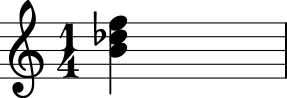

In [14]:
chord1.show()

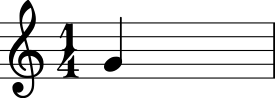

In [18]:
n = note.Note('G4')
n.show()
aInterval = interval.Interval(-24)

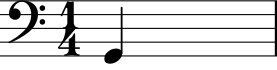

In [19]:
b = n.transpose(aInterval)
b.show()

# 2. Try Inversion 

# 3. Read with Music21

In [20]:
import xml.etree.cElementTree as ET

filename = "../../XMLs/至少還有你_主旋律.musicxml"
tree = ET.parse(filename)
root = tree.getroot()
root.tag, root.attrib
all_notes = root.findall('.//note')
xml_measures = root.findall('.//measure')


In [21]:
from mxlParsing import *

measures = []

for xml_measure in xml_measures:
    measure = Measure(get_meas_notes_xml(xml_measure))
    if not measure.get_sos()==['0']:
        measures.append(measure)

# 5. Create stream

In [22]:
stream_notes = measures[1].get_sos()
stream_notes

['F4', 'A4', 'D5', 'D5', 'D5', 'A4', 'A4']

In [23]:
stream_types = measures[1].get_notetypes()
stream_types

['eighth', '16th', '16th', 'half', 'eighth', '16th', '16th']

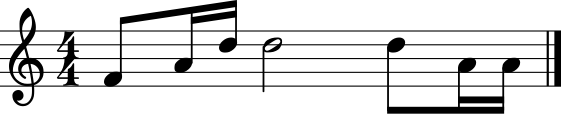

In [25]:
from music21 import *

s1 = stream.Stream()
for n,t in zip(stream_notes,stream_types):
    s1.append(note.Note(n,type=t))
s1.show()

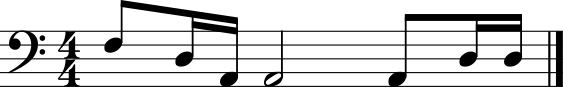

In [27]:
m2_inv = get_inverted_measure(measures[1])
m2_notes = m2_inv.get_sos()
m2_types = m2_inv.get_notetypes()
s2 = stream.Stream()
for n,t in zip(m2_notes,m2_types):
    s2.append(note.Note(n,type=t))
s2.show()
